In [1]:
!pip install gdown  # Ensure gdown is installed


In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1-SWJ_nIgotQ11ZHapb-uqWndvzeRs80d"
output_file = "Chest_XRay_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-SWJ_nIgotQ11ZHapb-uqWndvzeRs80d
From (redirected): https://drive.google.com/uc?id=1-SWJ_nIgotQ11ZHapb-uqWndvzeRs80d&confirm=t&uuid=96346de2-489f-466f-944c-944041d773f8
To: /content/Chest_XRay_Datasets.zip
100%|██████████| 1.01G/1.01G [00:23<00:00, 42.4MB/s]


'Chest_XRay_Datasets.zip'

In [3]:
'Chest_XRay_Datasets.zip'

'Chest_XRay_Datasets.zip'

In [4]:
import zipfile
z = zipfile.ZipFile('/content/Chest_XRay_Datasets.zip')
z.extractall()

# **Import** **Libraries**

In [5]:
import os
import torch
import random
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import datasets
import torch.optim as optim
import torch.nn.functional as F
from PIL import Image, ImageOps
from torch.utils.data import DataLoader, random_split

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [6]:
import os
import torch
import random
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import datasets
import torch.optim as optim
import torch.nn.functional as F
from PIL import Image, ImageOps
from torch.utils.data import DataLoader, random_split

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# **Plot** **Bar** **Graph**

[1594, 1470]
['PNEUMONIA', 'NORMAL']


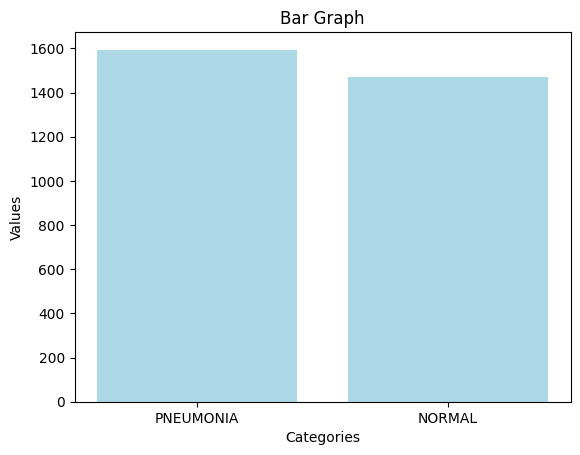

In [7]:
images_dir = "Chest_XRay_Datasets/train"
images_dir_folders = os.listdir(images_dir)

no_img_classes = []

for images_dir_folder in images_dir_folders:
  no_images = os.listdir(os.path.join(images_dir,images_dir_folder))
  no_img_classes.append(len(no_images))

print(no_img_classes)
print(images_dir_folders)


plt.bar(images_dir_folders, no_img_classes, color='lightblue')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Graph")

plt.show()

# **Display** **the** **images**

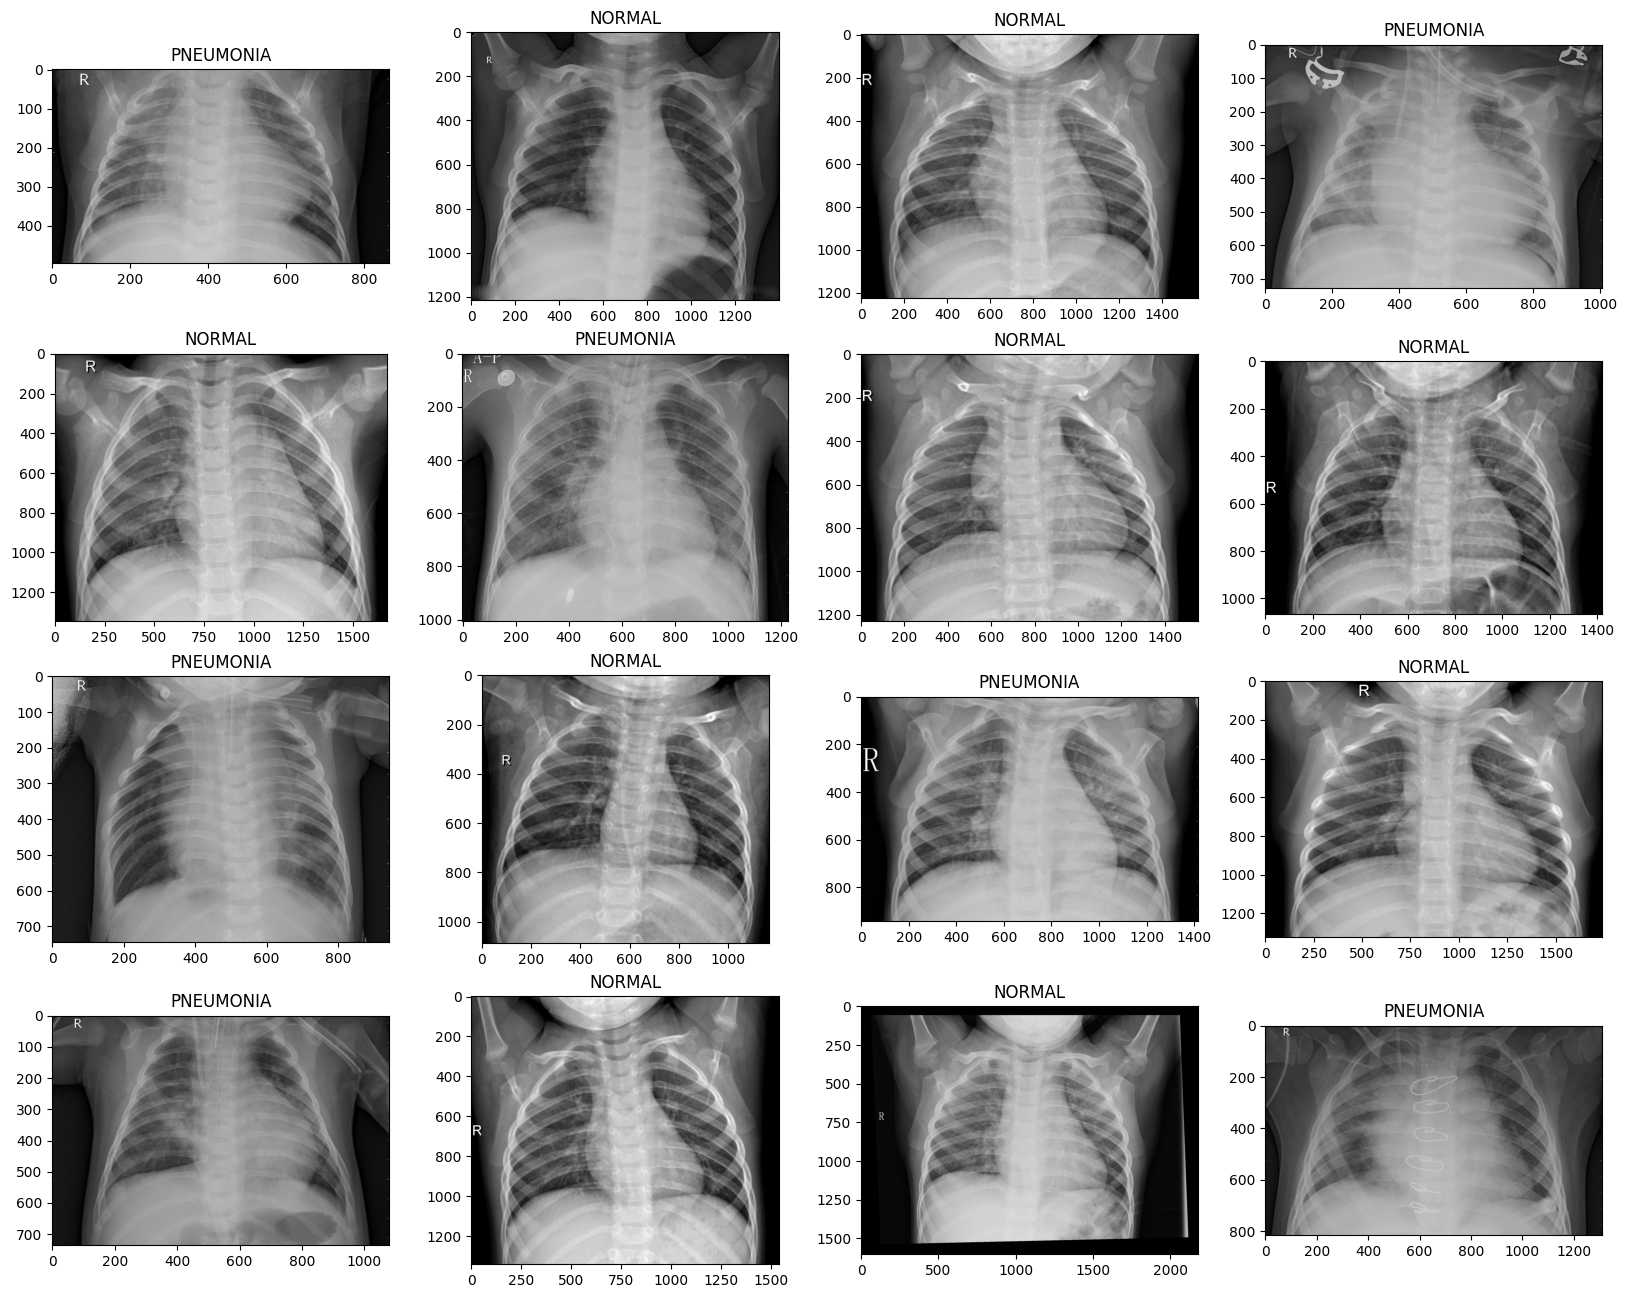

In [8]:
images_dir = "Chest_XRay_Datasets/train"
images_dir_folders = os.listdir(images_dir)

fig,ax = plt.subplots(4,4,figsize=(20,16))
ax = ax.ravel()

for i in range(16):
    images_folder = random.choice(images_dir_folders)
    images_files = os.listdir(os.path.join(images_dir,images_folder))
    img_path = os.path.join(images_dir,images_folder,random.choice(images_files))

    img = Image.open(img_path)
    cls_name = images_folder

    ax[i].imshow(img,cmap='gray')
    ax[i].set_title(cls_name)

plt.show()

# **Transfroms**

In [9]:
transformation = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure it's grayscale
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random crop & resize
    transforms.RandomHorizontalFlip(p=0.5),  # Flip with 50% probability
    transforms.RandomRotation(15),  # Rotate up to ±15 degrees
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), shear=10),  # Small shifts & shearing
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),  # Add slight blur for robustness
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale images
])

# **Create** **train** **oject**

In [10]:
# Load dataset
dataset = datasets.ImageFolder(root="Chest_XRay_Datasets/train", transform=transformation)
class_to_idx = dataset.class_to_idx

# Split dataset (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
traindata = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
valdata = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Print dataset sizes
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")


# Print class index mapping
print(class_to_idx)
print(len(train_dataset))
print(len(traindata))

Training samples: 2451
Validation samples: 613
{'NORMAL': 0, 'PNEUMONIA': 1}
2451
77


# **Plot** **the** **images**

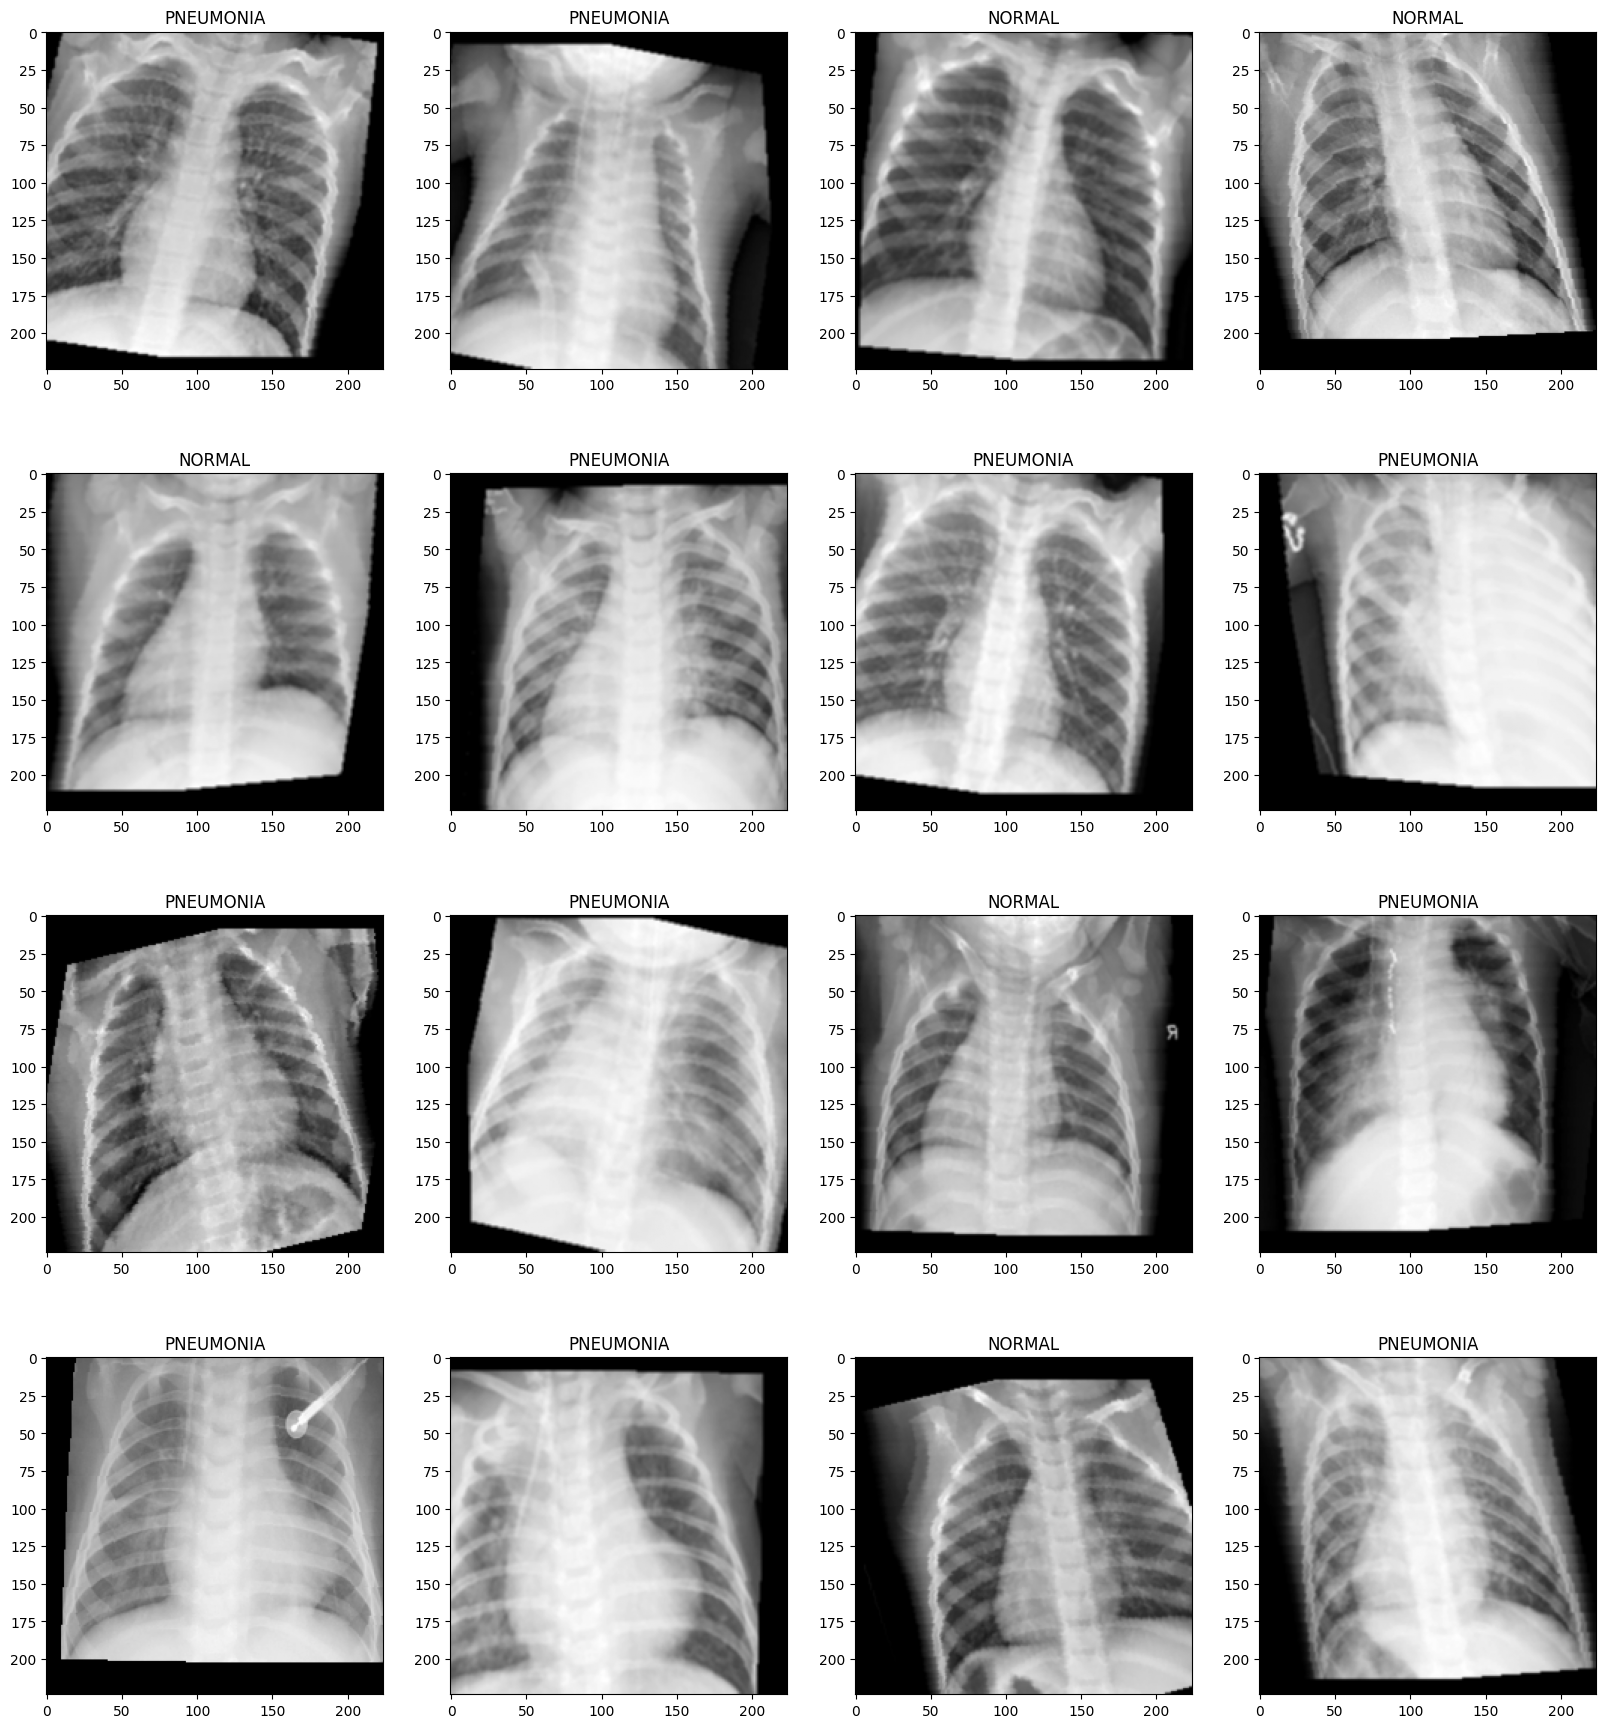

In [11]:
samples,labels = next(iter(traindata))

fig, axes = plt.subplots(4,4,figsize=(20,22))
axes = axes.ravel()

class_names = {0:'NORMAL', 1:'PNEUMONIA'}

for i in range(16):
    axes[i].imshow(samples[i].permute(1,2,0),cmap='gray')  ## (C,H,W) to (H,W,C)
    # print(labels[i])
    axes[i].set_title(class_names[labels[i].item()])

# **Create** **the** **CNN** **model**

In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        self.batch1 = nn.BatchNorm2d(num_features=16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.batch2 = nn.BatchNorm2d(num_features=32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.batch3 = nn.BatchNorm2d(num_features=64)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.batch4 = nn.BatchNorm2d(num_features=128)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=512, kernel_size=3)
        self.batch5 = nn.BatchNorm2d(num_features=512)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features=5*5*512, out_features=1024)
        self.fc1_batch = nn.BatchNorm1d(num_features=1024)

        self.fc2 = nn.Linear(in_features=1024, out_features=256)
        self.fc2_batch = nn.BatchNorm1d(num_features=256)

        self.fc3 = nn.Linear(in_features=256, out_features=128)
        self.fc3_batch = nn.BatchNorm1d(num_features=128)

        self.fc4 = nn.Linear(in_features=128, out_features=3)

        self.softmax = nn.Softmax(dim=1)


    def forward(self,x):
        x = self.conv1(x)
        x = self.batch1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.batch2(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.batch3(x)
        x = F.relu(x)
        x = self.pool3(x)

        x = self.conv4(x)
        x = self.batch4(x)
        x = F.relu(x)
        x = self.pool4(x)

        x = self.conv5(x)
        x = self.batch5(x)
        x = F.relu(x)
        x = self.pool5(x)

        x = self.flatten(x)

        x = self.fc1(x)
        x = self.fc1_batch(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = self.fc2_batch(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = self.fc3_batch(x)
        x = F.relu(x)

        x = self.fc4(x)
        x = self.softmax(x)

        return x

model = CNN().to(device)

# **Get** **the** **model** **summary**

In [13]:
from torchsummary import summary
summary(model, (1,224,224)) # (C,H,W)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 222, 222]             160
       BatchNorm2d-2         [-1, 16, 222, 222]              32
         MaxPool2d-3         [-1, 16, 111, 111]               0
            Conv2d-4         [-1, 32, 109, 109]           4,640
       BatchNorm2d-5         [-1, 32, 109, 109]              64
         MaxPool2d-6           [-1, 32, 54, 54]               0
            Conv2d-7           [-1, 64, 52, 52]          18,496
       BatchNorm2d-8           [-1, 64, 52, 52]             128
         MaxPool2d-9           [-1, 64, 26, 26]               0
           Conv2d-10          [-1, 128, 24, 24]          73,856
      BatchNorm2d-11          [-1, 128, 24, 24]             256
        MaxPool2d-12          [-1, 128, 12, 12]               0
           Conv2d-13          [-1, 512, 10, 10]         590,336
      BatchNorm2d-14          [-1, 512,

# **Define** **optimizers**

In [14]:
criterian = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs = 30

# **Define** **model** **training**

In [16]:
import os
import torch

train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []


best_val_loss = float('inf')  # Initialize with a high value

# Directory to save models
checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Define learning rate scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

for epoch in range(epochs):
    model.train()
    correct = 0
    train_running_loss = 0.0

    for data,labels in traindata:
        data,labels = data.to(device), labels.to(device)
        optimizer.zero_grad() ## convert the gradient values into zero for each batch
        output = model(data)
        loss = criterian(output, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.item()

        _,pred = torch.max(output,1)

        correct += (pred == labels).sum().item()

    epoch_train_loss = train_running_loss / len(traindata)
    epoch_train_accuracy = (100 * correct) / len(train_dataset)
    train_loss.append(epoch_train_loss)
    train_accuracy.append(epoch_train_accuracy)

    print(f'Epoch: {epoch+1} Training Loss: {epoch_train_loss} Training Accuracy: {epoch_train_accuracy}')

    with torch.no_grad():
        model.eval()
        correct = 0
        val_running_loss = 0.0
        for val_data, val_labels in valdata:
            val_data, val_labels = val_data.to(device), val_labels.to(device)
            val_output = model(val_data)
            val_loss_value = criterian(val_output, val_labels)

            val_running_loss += val_loss_value.item()
            _,val_pred = torch.max(val_output,1)
            correct += (val_pred == val_labels).sum().item()

        epoch_val_loss = val_running_loss / len(valdata)
        epoch_val_accuracy = (100 * correct) / len(val_dataset)
        val_loss.append(epoch_val_loss)
        val_accuracy.append(epoch_val_accuracy)

        print(f'Epoch: {epoch+1} Validation Loss: {epoch_val_loss} Validation Accuracy: {epoch_val_accuracy}')


        # **ModelCheckpoint: Save best model based on validation loss**
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            checkpoint_path = os.path.join(checkpoint_dir, f"best_model.pth")
            torch.save(model.state_dict(), checkpoint_path)
            print(f"🔥 Best model saved at {checkpoint_path} with Validation Loss: {epoch_val_loss:.4f}")

    # Update learning rate
    scheduler.step()
    print(f"🔄 Updated Learning Rate: {scheduler.get_last_lr()[0]:.6f}\n")

    print("\n")

Epoch: 1 Training Loss: 0.6679875889381806 Training Accuracy: 92.24806201550388
Epoch: 1 Validation Loss: 0.6734414100646973 Validation Accuracy: 91.84339314845025
🔥 Best model saved at checkpoints/best_model.pth with Validation Loss: 0.6734
🔄 Updated Learning Rate: 0.000099



Epoch: 2 Training Loss: 0.6485260725021362 Training Accuracy: 93.10485516115871
Epoch: 2 Validation Loss: 0.6594067484140396 Validation Accuracy: 90.70146818923328
🔥 Best model saved at checkpoints/best_model.pth with Validation Loss: 0.6594
🔄 Updated Learning Rate: 0.000099



Epoch: 3 Training Loss: 0.6396778806463465 Training Accuracy: 92.86005711954304
Epoch: 3 Validation Loss: 0.6273174077272415 Validation Accuracy: 93.6378466557912
🔥 Best model saved at checkpoints/best_model.pth with Validation Loss: 0.6273
🔄 Updated Learning Rate: 0.000097



Epoch: 4 Training Loss: 0.6398661748155371 Training Accuracy: 92.12566299469604
Epoch: 4 Validation Loss: 0.633474588394165 Validation Accuracy: 92.98531810766721
🔄

# **Plot** **the** **graph**

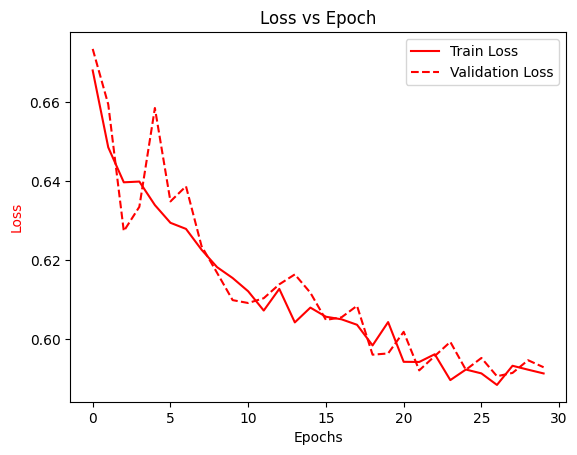

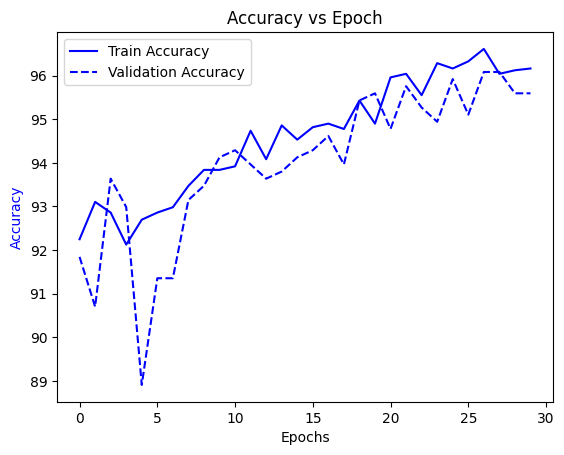

In [17]:
epoch_log = [*range(epochs)]

fig,ax1 = plt.subplots()
ax1.plot(epoch_log,train_loss,'r-',label = 'Train Loss')
ax1.plot(epoch_log,val_loss,'r--',label = 'Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss',color='r')
ax1.set_title('Loss vs Epoch')
ax1.legend()
plt.show()

fig,ax2 = plt.subplots()
ax2.plot(epoch_log,train_accuracy,'b-',label = 'Train Accuracy')
ax2.plot(epoch_log,val_accuracy,'b--',label = 'Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy',color='b')
ax2.set_title('Accuracy vs Epoch')
ax2.legend()
plt.show()

# **Load** **the** ***model***

In [18]:
# Initialize the model before loading weights
model = CNN()  # Ensure MyModel is defined
model.load_state_dict(torch.load("checkpoints/best_model.pth"))  # Load state_dict into the model
model.to(device)  # Move model to GPU or CPU
model.eval()  # Set to evaluation mode

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (batch1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (batch2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batch4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 512, kernel_siz

# **Plot** **the** **images**

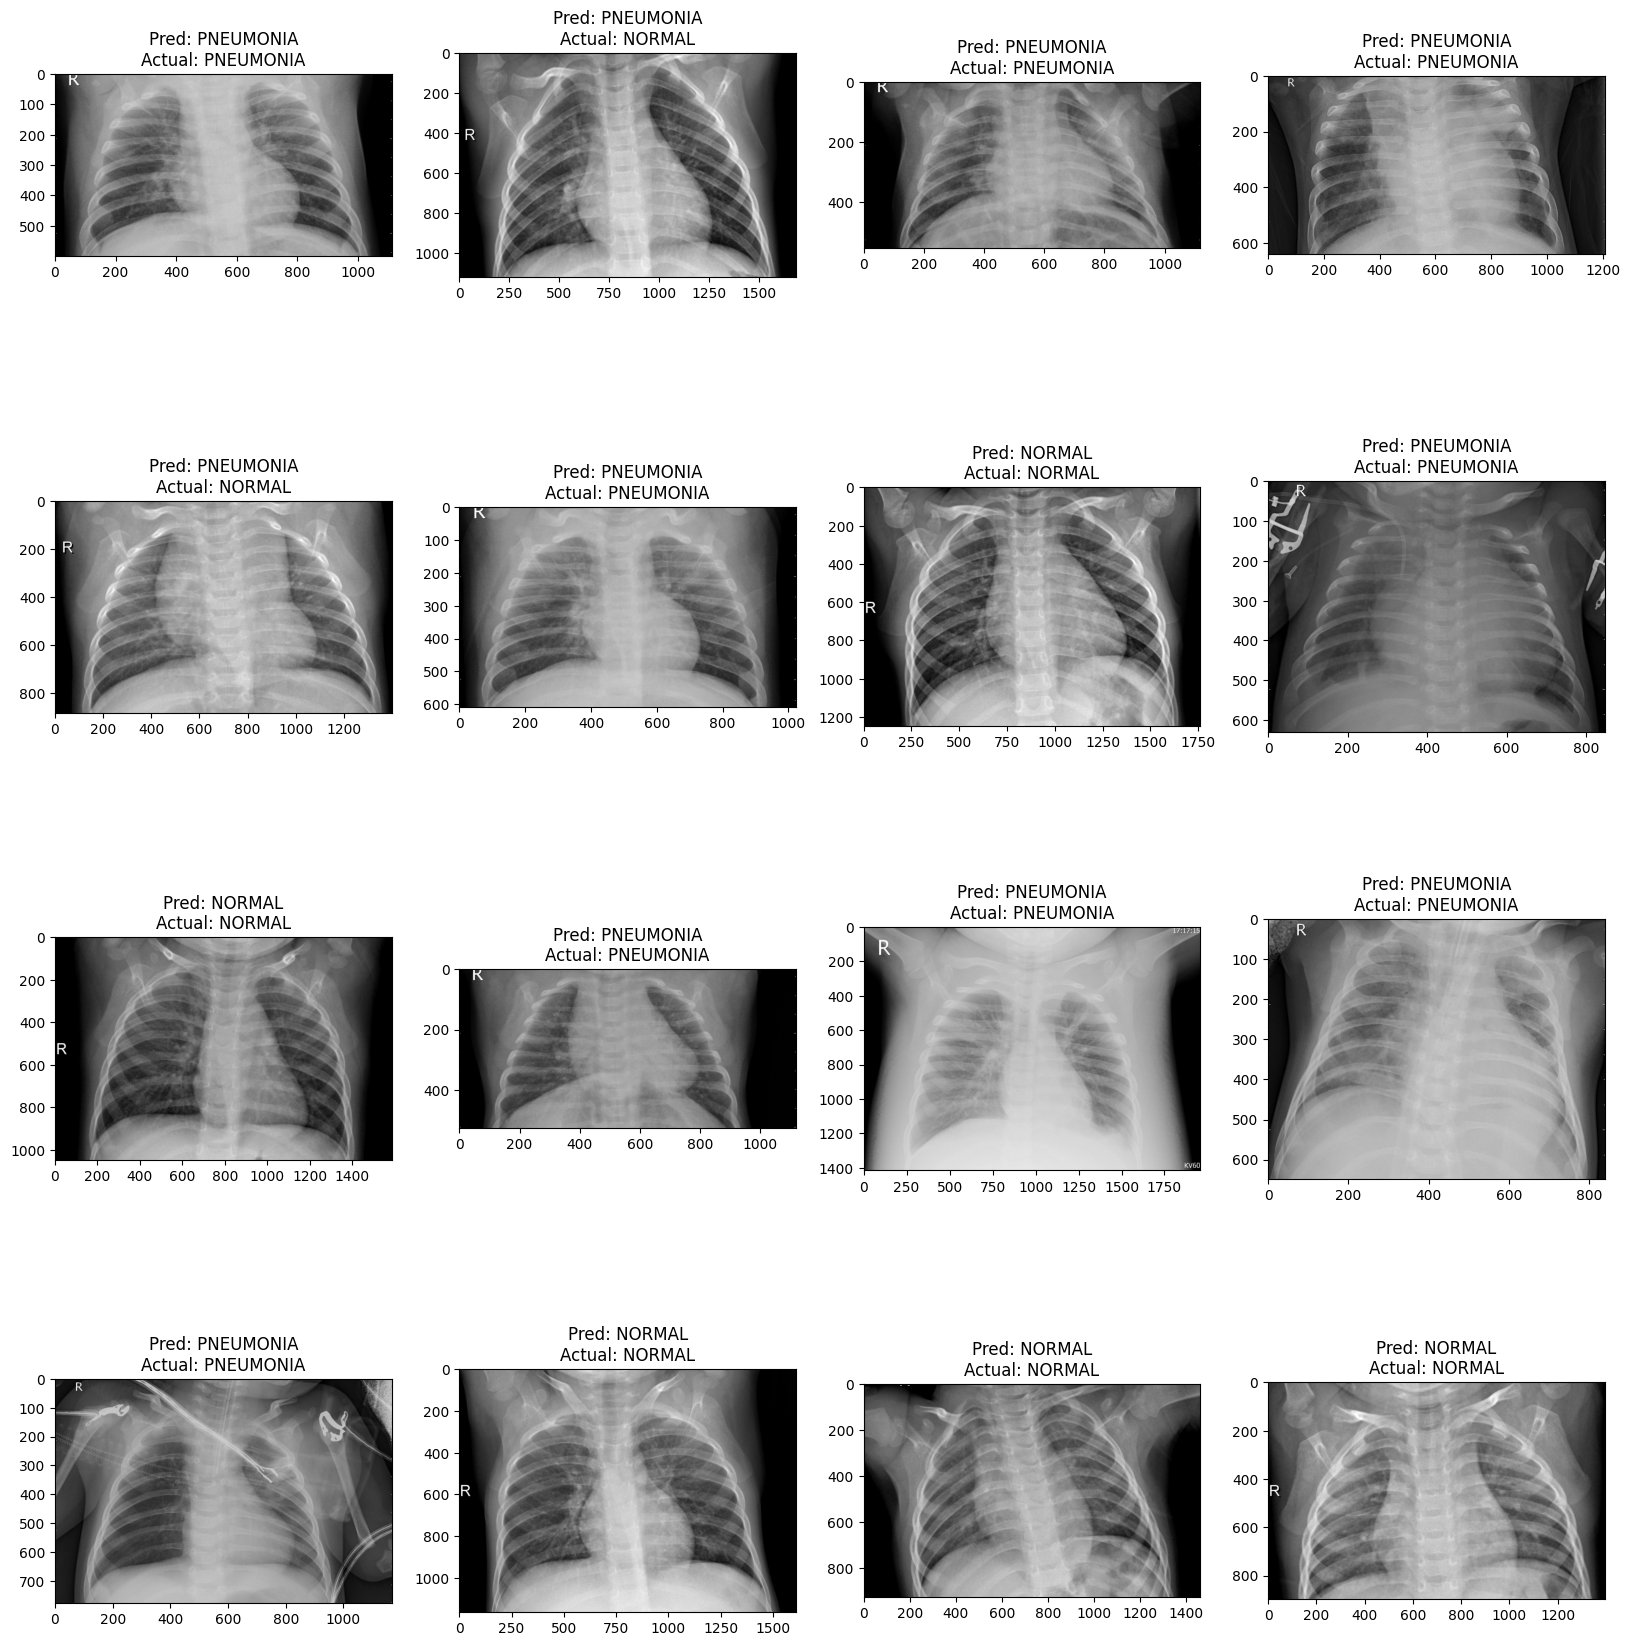

In [19]:
import random

test_dir = "Chest_XRay_Datasets/test"
test_dir_folders = os.listdir(test_dir)

images = []
def preprocessing(image):
    img = transformation(image) ##  (c,h,w) required == (b,c,h,w) ==> (1,3,60,60)
    img = img.unsqueeze(0)
    return img

fig, axes = plt.subplots(4,4,figsize=(20,22))
axes = axes.ravel()

class_names = {0:'NORMAL', 1:'PNEUMONIA'}

for i in range(16):
    img_folder = random.choice(test_dir_folders)
    img_filenames = os.listdir(os.path.join(test_dir,img_folder))
    img_path = os.path.join(test_dir, img_folder, random.choice(img_filenames))

    image = Image.open(img_path)
    preprocessed_img = ImageOps.grayscale(image)
    preprocessed_img = preprocessing(preprocessed_img)
    preprocessed_img = preprocessed_img.to(device)

    output = model(preprocessed_img)
    pred = torch.argmax(output).item()
    label = class_names[pred]

    axes[i].imshow(image,cmap='gray')
    axes[i].set_title(f'Pred: {label}\nActual: {img_folder}')

plt.show()